In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('kaggle_data/ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df = df.drop(columns=['ID', 'name', 'deadline', 'goal', 'launched', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])
df.head()

,category,main_category,currency,state,country,usd_goal_real
0,Poetry,Publishing,GBP,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,failed,US,30000.00
2,Narrative Film,Film & Video,USD,failed,US,45000.00
3,Music,Music,USD,failed,US,5000.00
4,Film & Video,Film & Video,USD,canceled,US,19500.00


In [6]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       378661 non-null  object 
 1   main_category  378661 non-null  object 
 2   currency       378661 non-null  object 
 3   state          378661 non-null  object 
 4   country        378661 non-null  object 
 5   usd_goal_real  378661 non-null  float64
dtypes: float64(1), object(5)
memory usage: 17.3+ MB


In [9]:
df.nunique()

category           159
main_category       15
currency            14
state                6
country             23
usd_goal_real    50339
dtype: int64

In [10]:
df['category'].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [12]:
success_rate = round(df['state'].value_counts() / len(df['state']), 2)
success_rate

failed        0.52
successful    0.35
canceled      0.10
undefined     0.01
live          0.01
suspended     0.00
Name: state, dtype: float64

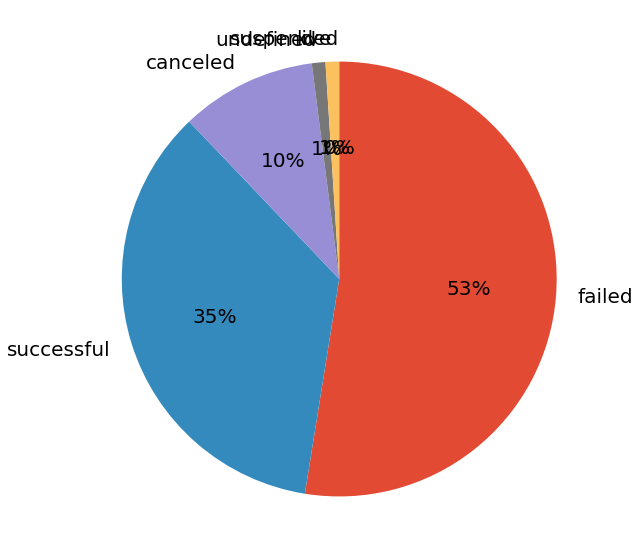

In [14]:
plt.figure(figsize=(10, 10))

plt.pie(success_rate,
       labels=success_rate.index,
       startangle=90,
       autopct='%.0f%%',
       textprops={'fontsize': 20},
       counterclock=False,
       normalize=True)

plt.show()

In [15]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [17]:
trace = go.Pie(
    labels=success_rate.index,
    values=success_rate,
    marker=dict(colors=['red'])
)

layout = go.Layout(
    title='Pie',
    legend=dict(orientation='h')
)

data = [trace]
fig = go.Figure(data, layout=layout)
iplot(fig)

<BarContainer object of 15 artists>

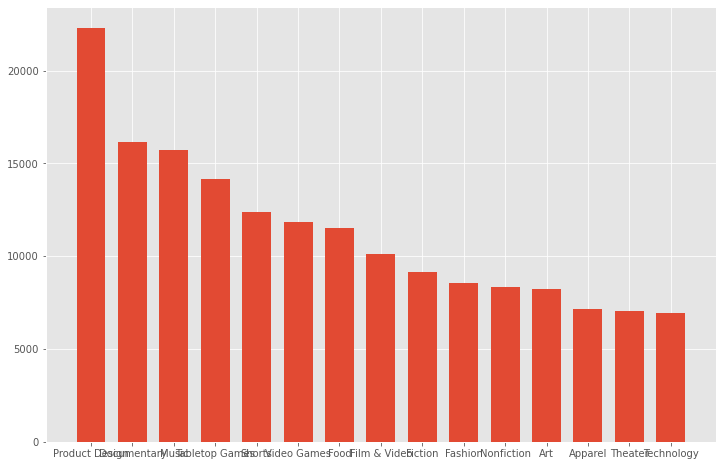

In [18]:
plt.figure(figsize=(12, 8))

plt.bar(
    x=df['category'].value_counts().index[:15],
    height=df['category'].value_counts()[:15],
    width=0.7
)

In [19]:
trace = go.Bar(
    x=df['category'].value_counts().index,
    y=df['category'].value_counts(),
    name='Category'
)

layout = go.Layout(
    title='Bar',
    legend=dict(orientation='h')
)

data = [trace]

fig = go.Figure(data, layout=layout)
iplot(fig)

In [20]:
category = df['main_category'].value_counts()
category

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [21]:
category_success = df[df['state'] == 'successful']['main_category'].value_counts()
category_success

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [23]:
category_success_rate = round(category_success / category , 2).sort_values(ascending=False)

In [24]:
trace = go.Bar(
    x=category_success_rate.index,
    y=category_success_rate,
    name='Category success rate'
)

layout = go.Layout(
    title='Bar',
    legend=dict(orientation='h')
)

data = [trace]

fig = go.Figure(data, layout=layout)
iplot(fig)

In [26]:
groupby = df.groupby('main_category').sum().sort_values('usd_goal_real', ascending=False)

trace = go.Bar(
    x=groupby.index,
    y=groupby['usd_goal_real'],
    name='usd_goal_real'
)

layout = go.Layout(
    title='Bar',
    legend=dict(orientation='h')
)

data = [trace]

fig = go.Figure(data, layout=layout)
iplot(fig)

<AxesSubplot:xlabel='main_category', ylabel='usd_goal_real'>

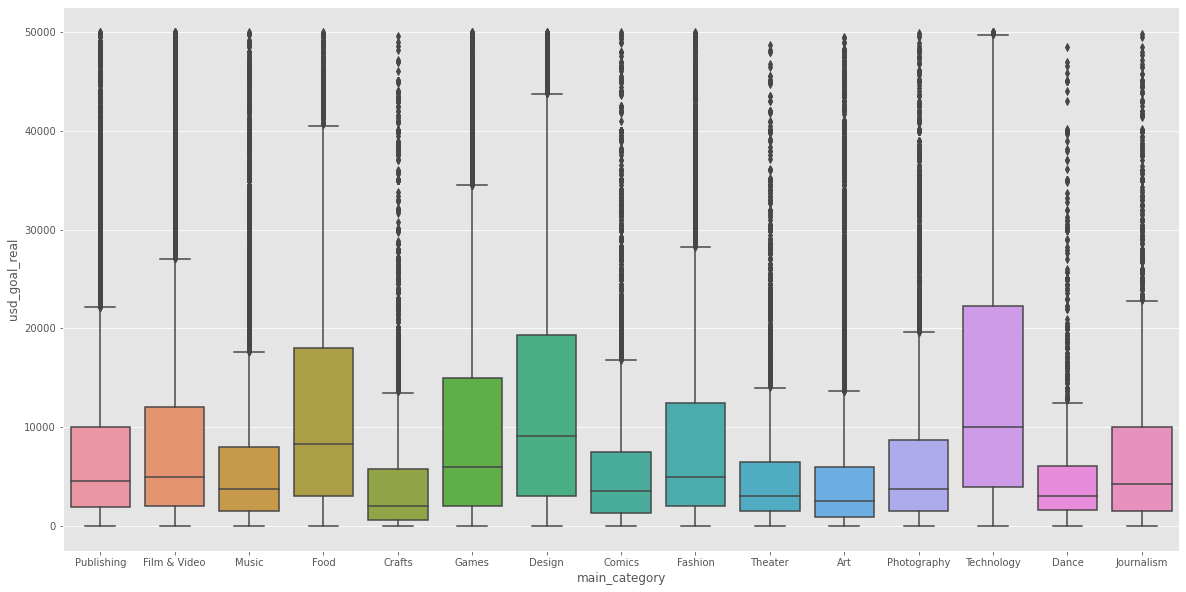

In [28]:
df = df[df['usd_goal_real'] < 50000]

plt.figure(figsize=(20, 10))
sns.boxplot(
    data=df,
    x=df['main_category'],
    y=df['usd_goal_real']
)

In [29]:
pd.get_dummies(df['currency']).head()

,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
pd.get_dummies(df['currency'], drop_first=True).head()

,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
df['currency'].value_counts()

USD    267500
GBP     31192
EUR     14701
CAD     13770
AUD      7173
MXN      1697
SEK      1615
NZD      1366
DKK      1029
NOK       651
CHF       592
HKD       549
SGD       521
JPY        37
Name: currency, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
cat_features = ['category', 'main_category', 'currency', 'state', 'country']

for col in cat_features:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(df[col].values)
    
df.head()

,category,main_category,currency,state,country,usd_goal_real
0,108,12,5,1,9,1533.95
1,93,6,13,1,22,30000.00
2,93,6,13,1,22,45000.00
3,90,10,13,1,22,5000.00
4,55,6,13,0,22,19500.00
